In [5]:
from models import Models
from Data_preprocessing import split_60 ,split_train_val_test,split_60_no_overlap,split_60_15_overlap

import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

from keras.optimizers import RMSprop ,Adam ,SGD ,Adagrad
import json
import os
import matplotlib.pyplot as plt

import tensorflow as tf
tf.random.set_seed(1234)

import numpy as np
random_seed = 42
pd.np.random.seed(random_seed)


/tmp/ipykernel_21403/1296703767.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.seed(random_seed)


In [6]:
# input_path = 'dataframes/data.csv'
# split_train_val_test(input_path)


for i in ['train','val','test']:

    input_path = f'./dataframes/{i}.csv'
    output_path = f'./dataframes/{i}60_15_overlap.csv'

    split_60_15_overlap(input_path,output_path)

In [3]:
df = pd.read_csv('dataframes/data.csv')
# split_60_no_overlap()
df

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,hr,calculated_hr,DBP,SBP
0,-0.015026,-0.001733,0.011110,0.022558,0.031212,0.035420,0.033672,0.025094,0.009881,-0.010513,...,0.112645,0.088309,0.052209,0.006952,-0.044490,-0.099303,87,86.84,79,149
1,0.009319,-0.000972,-0.010893,-0.019681,-0.026221,-0.029201,-0.027411,-0.020119,-0.007410,0.009647,...,-0.048893,-0.059609,-0.060138,-0.051912,-0.037725,-0.020943,87,86.84,79,149
2,0.031676,0.021102,0.010552,0.000255,-0.009251,-0.017156,-0.022590,-0.024934,-0.024101,-0.020616,...,-0.017068,0.005202,0.027498,0.049229,0.070225,0.090754,87,87.73,79,149
3,-0.042033,-0.022354,-0.002957,0.015366,0.031199,0.042626,0.047645,0.044781,0.033687,0.015486,...,0.030836,-0.003730,-0.036983,-0.067830,-0.096421,-0.123827,87,88.62,79,149
4,0.040075,0.019724,-0.000237,-0.018829,-0.034421,-0.044933,-0.048350,-0.043412,-0.030213,-0.010421,...,-0.074477,-0.031781,0.014527,0.061861,0.108859,0.155360,87,87.73,79,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.021915,0.010233,-0.001264,-0.012093,-0.021401,-0.028009,-0.030592,-0.028003,-0.019672,-0.005984,...,-0.069095,-0.045540,-0.012001,0.027887,0.070738,0.114347,87,151.52,83,166
1291,0.002217,0.001418,0.000718,0.000311,0.000446,0.001306,0.002824,0.004519,0.005485,0.004626,...,0.022136,0.026457,0.021502,0.007924,-0.011646,-0.033785,87,151.52,83,166
1292,-0.008433,-0.000182,0.007720,0.014556,0.019276,0.020668,0.017702,0.009997,-0.001762,-0.015685,...,0.045735,0.023715,-0.000813,-0.025067,-0.047871,-0.069621,87,85.07,83,166
1293,0.006662,-0.004312,-0.014832,-0.023983,-0.030441,-0.032648,-0.029139,-0.018994,-0.002302,0.019520,...,-0.040524,-0.031543,-0.015477,0.005266,0.028295,0.051957,87,150.64,83,166


In [6]:



df_input = df.drop(['hr','calculated_hr','DBP','SBP'], axis=1)

df_mod=pd.DataFrame()
l=[]
for x in range(0,181,60):
    print(x,x+60)
#     dfx = df_input.iloc[:, x:x+60]
#     desired_order = [str(i) for i in range(60)]
#     dfx.columns = desired_order
#     dfx.loc[:,'hr'] = df['hr'] 
#     dfx.loc[:,'calculated_hr'] = df['calculated_hr']
#     dfx.loc[:,'DBP'] = df['DBP']
#     dfx.loc[:,'SBP'] = df['SBP']

# #     display(dfx)
#     l.append(dfx)

# df_mod = pd.concat(l)

# df_mod = df_mod.reset_index(drop=True)

# df_mod.to_csv(output_path, index=False)

0 60
60 120
120 180
180 240


In [34]:
df_train = pd.read_csv('dataframes/train60.csv')
df_val = pd.read_csv('dataframes/val60.csv')
df_test = pd.read_csv('dataframes/test60.csv')
ratio = len(df_train),len(df_val),len(df_test)
print(ratio)
df = pd.concat([df_train ,df_val ,df_test ])
df = df.reset_index(drop=True)

(5439, 1813, 1813)


In [35]:
df_input = df.drop(['DBP','SBP','hr','calculated_hr'], axis=1)
df_target = df[['DBP','SBP']]

scaler = MinMaxScaler()
scaled_df_target = scaler.fit_transform(df_target)
print(df_input.shape)
print(scaled_df_target.shape)

df_target = scaled_df_target

X_train, y_train, X_val, y_val, X_test, y_test = (df_input[:ratio[0]],df_target[:ratio[0]],
                                        df_input[ratio[0]:ratio[0]+ratio[1]],df_target[ratio[0]:ratio[0]+ratio[1]], 
                                        df_input[-ratio[2]:],df_target[-ratio[2]:])

(9065, 60)
(9065, 2)


In [7]:
model_name = 'model2_bpm'
NUM_EPOCH = 400

lr = 5e-4
optimizer = RMSprop(learning_rate=lr)
loss = "mse"

In [8]:
models = Models()
model = models.import_model("model2_bpm")
model.summary()

2023-06-09 14:27:58.329176: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-09 14:27:58.329231: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (atamach01): /proc/driver/nvidia/version does not exist
2023-06-09 14:27:58.331467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 240)          173760    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 60, 240)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 120)              144480    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 2)                 2

In [9]:
model.compile(loss=loss, optimizer=optimizer, metrics=['mse','mae'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=NUM_EPOCH )


optimizer_name = optimizer.get_config()['name']
file_path = f'{model_name}_lr:{lr}_NUM_EPOCH:{NUM_EPOCH}_optimizer:{optimizer_name}_loss:{loss}'
history_dict = history.history
with open(f'history/{file_path}.json', 'w') as f:
    json.dump(history_dict, f)


results = model.evaluate(X_test, y_test)
save_model(model, f"models/{file_path}.h5")

Epoch 1/400
170/170 [==============================] - 41s 209ms/step - loss: 0.0542 - mse: 0.0542 - mae: 0.1833 - val_loss: 0.0448 - val_mse: 0.0448 - val_mae: 0.1665
Epoch 2/400
170/170 [==============================] - 36s 210ms/step - loss: 0.0495 - mse: 0.0495 - mae: 0.1757 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1658
Epoch 3/400
170/170 [==============================] - 27s 161ms/step - loss: 0.0489 - mse: 0.0489 - mae: 0.1740 - val_loss: 0.0439 - val_mse: 0.0439 - val_mae: 0.1657
Epoch 4/400
170/170 [==============================] - 46s 272ms/step - loss: 0.0483 - mse: 0.0483 - mae: 0.1729 - val_loss: 0.0439 - val_mse: 0.0439 - val_mae: 0.1646
Epoch 5/400
170/170 [==============================] - 37s 218ms/step - loss: 0.0484 - mse: 0.0484 - mae: 0.1730 - val_loss: 0.0449 - val_mse: 0.0449 - val_mae: 0.1652
Epoch 6/400
170/170 [==============================] - 25s 146ms/step - loss: 0.0481 - mse: 0.0481 - mae: 0.1727 - val_loss: 0.0449 - val_mse: 0.0449 - val_mae:

170/170 [==============================] - 25s 146ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1681 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1646
Epoch 98/400
170/170 [==============================] - 25s 146ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1679 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1660
Epoch 99/400
170/170 [==============================] - 25s 146ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1683 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1644
Epoch 100/400
170/170 [==============================] - 25s 146ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1679 - val_loss: 0.0461 - val_mse: 0.0461 - val_mae: 0.1673
Epoch 101/400
170/170 [==============================] - 25s 146ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1682 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1643
Epoch 102/400
170/170 [==============================] - 25s 149ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1680 - val_loss: 0.0455 - val_mse: 0.0455 - val_mae: 0.1

170/170 [==============================] - 32s 189ms/step - loss: 0.0435 - mse: 0.0435 - mae: 0.1623 - val_loss: 0.0466 - val_mse: 0.0466 - val_mae: 0.1680
Epoch 194/400
170/170 [==============================] - 31s 182ms/step - loss: 0.0434 - mse: 0.0434 - mae: 0.1621 - val_loss: 0.0466 - val_mse: 0.0466 - val_mae: 0.1681
Epoch 195/400
170/170 [==============================] - 31s 182ms/step - loss: 0.0436 - mse: 0.0436 - mae: 0.1623 - val_loss: 0.0481 - val_mse: 0.0481 - val_mae: 0.1710
Epoch 196/400
170/170 [==============================] - 34s 199ms/step - loss: 0.0432 - mse: 0.0432 - mae: 0.1616 - val_loss: 0.0477 - val_mse: 0.0477 - val_mae: 0.1705
Epoch 197/400
170/170 [==============================] - 29s 169ms/step - loss: 0.0433 - mse: 0.0433 - mae: 0.1618 - val_loss: 0.0467 - val_mse: 0.0467 - val_mae: 0.1692
Epoch 198/400
170/170 [==============================] - 31s 183ms/step - loss: 0.0434 - mse: 0.0434 - mae: 0.1617 - val_loss: 0.0473 - val_mse: 0.0473 - val_mae: 0

170/170 [==============================] - 26s 152ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1366 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0.1849
Epoch 290/400
170/170 [==============================] - 26s 150ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1378 - val_loss: 0.0556 - val_mse: 0.0556 - val_mae: 0.1851
Epoch 291/400
170/170 [==============================] - 25s 150ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1364 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1863
Epoch 292/400
170/170 [==============================] - 26s 150ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1369 - val_loss: 0.0555 - val_mse: 0.0555 - val_mae: 0.1846
Epoch 293/400
170/170 [==============================] - 26s 152ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1360 - val_loss: 0.0562 - val_mse: 0.0562 - val_mae: 0.1854
Epoch 294/400
170/170 [==============================] - 25s 150ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1359 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0

170/170 [==============================] - 48s 286ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0975 - val_loss: 0.0659 - val_mse: 0.0659 - val_mae: 0.2011
Epoch 386/400
170/170 [==============================] - 49s 289ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0972 - val_loss: 0.0657 - val_mse: 0.0657 - val_mae: 0.2009
Epoch 387/400
170/170 [==============================] - 43s 254ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0963 - val_loss: 0.0669 - val_mse: 0.0669 - val_mae: 0.2028
Epoch 388/400
170/170 [==============================] - 33s 195ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0971 - val_loss: 0.0654 - val_mse: 0.0654 - val_mae: 0.2005
Epoch 389/400
170/170 [==============================] - 30s 179ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0957 - val_loss: 0.0650 - val_mse: 0.0650 - val_mae: 0.1999
Epoch 390/400
170/170 [==============================] - 29s 170ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0955 - val_loss: 0.0664 - val_mse: 0.0664 - val_mae: 0

In [10]:
loaded_model = load_model(f"models/{file_path}.h5")

In [11]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 2s 41ms/step - loss: 0.0637 - mse: 0.0637 - mae: 0.1960


[0.06366101652383804, 0.06366101652383804, 0.195954367518425]

In [12]:
y_predicted = loaded_model.predict(X_test)

57/57 [==============================] - 4s 41ms/step


In [13]:
y_predicted_df = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)
y_predicted_df = pd.DataFrame(y_predicted_df)
y_test = pd.DataFrame(y_test)

In [14]:
print(y_predicted_df[10:20])
print(y_test[10:20])

            0           1
10  82.895996  135.071533
11  86.886398  142.389908
12  68.401596  109.081474
13  83.282402  131.997986
14  72.521057  111.162613
15  72.175087  109.854523
16  87.736412  143.260162
17  68.069855   98.952766
18  83.328186  132.304153
19  72.882370  105.887962
       0      1
10  83.0  119.0
11  76.0  121.0
12  79.0  114.0
13  79.0  149.0
14  71.0  129.0
15  79.0  134.0
16  97.0  156.0
17  79.0  149.0
18  84.0  121.0
19  79.0  133.0


In [15]:
mae = np.mean(np.abs(y_predicted_df[0].values - y_test[0].values))
print("DBP-MAE:", mae)
mae = np.mean(np.abs(y_predicted_df[1].values - y_test[1].values))
print("SDP-MAE:", mae)
mse = np.mean(np.square(y_predicted_df[0].values - y_test[0].values))
print("DBP-MSE:", mse)
mse = np.mean(np.square(y_predicted_df[1].values - y_test[1].values))
print("SDP-MSE:", mse)

DBP-MAE: 7.60353472583937
SDP-MAE: 16.05176342197761
DBP-MSE: 98.86625526755527
SDP-MSE: 406.9397506085454


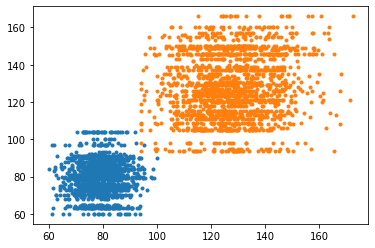

In [16]:
plt.scatter(y_predicted_df[0],y_test[0],marker='.')
plt.scatter(y_predicted_df[1],y_test[1],marker='.')

In [17]:
with open(f'history/{file_path}.json', 'r') as f:
    history_dict = json.load(f)

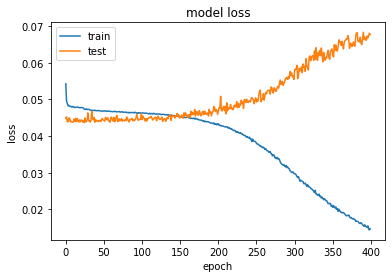

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# df_train = pd.read_csv('dataframes/train60.csv')
# df_val = pd.read_csv('dataframes/val60.csv')
# df_test = pd.read_csv('dataframes/test60.csv')
# ratio = len(df_train),len(df_val),len(df_test)
# print(ratio)
# df = pd.concat([df_train ,df_val ,df_test ])
# df = df.reset_index(drop=True)


# df_input = df.drop(['DBP','SBP','hr','calculated_hr'], axis=1)
# df_target = df[['DBP','SBP']]

# scaler = MinMaxScaler()
# scaled_df_target = scaler.fit_transform(df_target)
# print(df_input.shape)
# print(scaled_df_target.shape)

# # df_target = scaled_df_target

# X_train, y_train, X_val, y_val, X_test, y_test = (df_input[:ratio[0]],df_target[:ratio[0]],
#                                         df_input[ratio[0]:ratio[0]+ratio[1]],df_target[ratio[0]:ratio[0]+ratio[1]], 
#                                         df_input[-ratio[2]:],df_target[-ratio[2]:])

(5439, 1813, 1813)
(9065, 60)
(9065, 2)


In [37]:
file_path = f'{model_name}_lr:{lr}_NUM_EPOCH:180_optimizer:{optimizer_name}_loss:{loss}'
loaded_model = load_model(f"models/{file_path}.h5")

In [38]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 2s 33ms/step - loss: 0.0637 - mse: 0.0637 - mae: 0.1960


[0.06366101652383804, 0.06366101652383804, 0.195954367518425]

In [39]:
y_predicted = loaded_model.predict(X_test)

57/57 [==============================] - 3s 32ms/step


In [40]:
y_predicted_df = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)
y_predicted_df = pd.DataFrame(y_predicted_df)
y_test = pd.DataFrame(y_test)

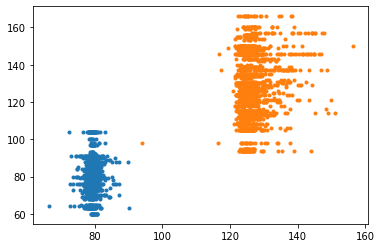

In [42]:

plt.scatter(y_predicted_df[0],y_test[0],marker='.')
plt.scatter(y_predicted_df[1],y_test[1],marker='.')

In [46]:
mae = np.mean(np.abs(y_predicted_df[0].values - y_test[0].values))
print("DBP-MAE:", mae)
mae = np.mean(np.abs(y_predicted_df[1].values - y_test[1].values))
print("SDP-MAE:", mae)
mse = np.mean(np.square(y_predicted_df[0].values - y_test[0].values))
print("DBP-MSE:", mse)
mse = np.mean(np.square(y_predicted_df[1].values - y_test[1].values))
print("SDP-MSE:", mse)

DBP-MAE: 6.247246348259532
SDP-MAE: 13.697043947534409
DBP-MSE: 69.01547734022755
SDP-MSE: 285.331580290883


In [43]:
with open(f'history/{file_path}.json', 'r') as f:
    history_dict = json.load(f)

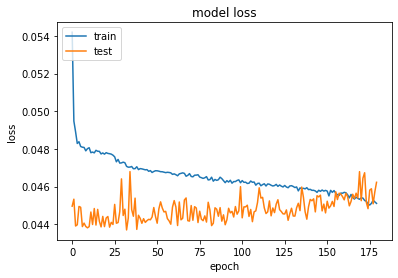

In [56]:
# summarize history for loss
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
y_test_new = y_test.reset_index(drop=True)

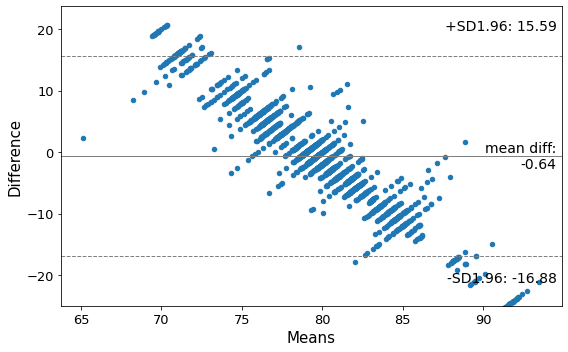

In [64]:
import statsmodels.api as sm

#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(y_predicted_df[0], y_test_new[0], ax = ax)

#display Bland-Altman plot
plt.savefig(f'./images/bland_altman-dbp.jpeg')
plt.show()

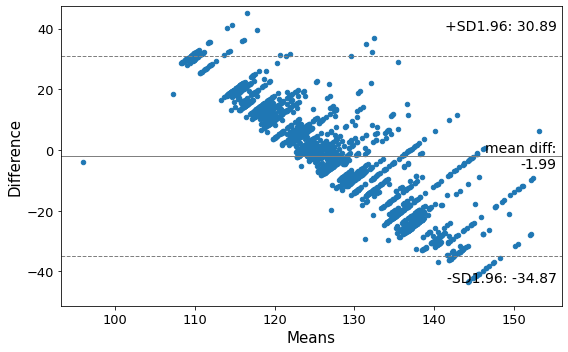

In [65]:

#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(y_predicted_df[1], y_test_new[1], ax = ax)

#display Bland-Altman plot
plt.savefig(f'./images/bland_altman-sbp.jpeg')
plt.show()

In [66]:
df=pd.DataFrame()
df['DBP_Prediction']=y_predicted_df[0]
df['DBP_Actual']=y_test_new[0]
df['SBP_Prediction']=y_predicted_df[1]
df['SBP_Actual']=y_test_new[1]

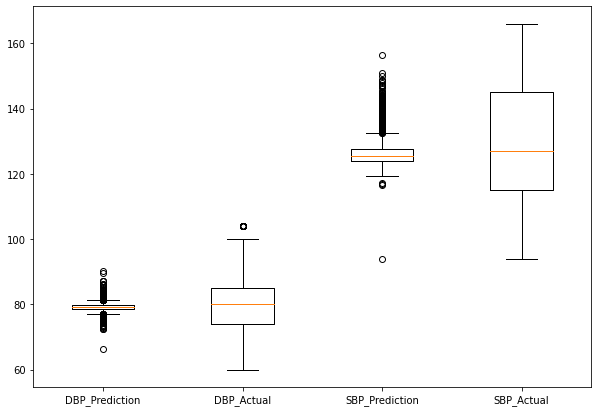

In [67]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df)
positions = [1, 2, 3, 4]  
labels = ['DBP_Prediction', 'DBP_Actual', 'SBP_Prediction', 'SBP_Actual'] 
plt.xticks(positions, labels) 
plt.savefig(f'./images/boxplot.jpeg')
plt.show()